In [1]:
import requests
r = requests.get("https://www.iea.org/policies")
r.__dict__.keys()

dict_keys(['_content', '_content_consumed', '_next', 'status_code', 'headers', 'raw', 'url', 'encoding', 'history', 'reason', 'cookies', 'elapsed', 'request', 'connection'])

In [2]:
from rich.pretty import pprint
pprint(r.__dict__, max_string=21)

{
│   '_content': b'<!DOCTYPE html>\n<html'+349643,
│   '_content_consumed': True,
│   '_next': None,
│   'status_code': 200,
│   'headers': {'Date': 'Mon, 25 Sep 2023 14:23:45 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'public, max-age=14400', 'Content-Security-Policy-Report-Only': "base-uri 'self';connect-src 'self' https: https://www.recaptcha.net https://challenges.cloudflare.com wss:;default-src 'self' https: wss: blob: data:;form-action 'self' https:;img-src 'self' https: http://iea.imgix.net https://iea.imgix.net data:;media-src 'self' https: data: http://iea.imgix.net https://iea.imgix.net;object-src 'none';script-src 'self' 'unsafe-eval' https://www.google.com https://www.googletagmanager.com https://www.youtube.com https://www.google-analytics.com https://www.recaptcha.net https://challenges.cloudflare.com https://snap.licdn.com https://www.gstatic.com https://stats.g.doubleclick.net https://p.adsymptotic.com https://px.ads.linkedin.com 'sha256-l/3fcn6MZG0SSVJq6fOLe49ZKIjbWdNzhreJz7KQ/1M=' 'sha256-+MedjqNIfWWYUGuHJ53XLEjzmGDCp9Om50MVUO/C/zo=' https://ieatest.blob.core.windows.net https://iea.blob.core.windows.net 'nonce-46V9Y7nBp4P6jIL0dbsUdrBz6yJfM130';style-src 'self' https: 'unsafe-inline';worker-src https://ieatest.blob.core.windows.net https://iea.blob.core.windows.net;frame-ancestors 'self'", 'Referrer-Policy': 'no-referrer-when-downgrade', 'Strict-Transport-Security': 'max-age=31536000;', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'SAMEORIGIN', 'X-Xss-Protection': '1; mode=block', 'CF-Cache-Status': 'EXPIRED', 'Last-Modified': 'Mon, 25 Sep 2023 14:22:56 GMT', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare', 'CF-RAY': '80c3ed3fddb7190b-FRA', 'Content-Encoding': 'gzip'},
│   'raw': <urllib3.response.HTTPResponse object at 0x0000021EF2F7CDF0>,
│   'url': 'https://www.iea.org/p'+7,
│   'encoding': 'UTF-8',
│   'history': [],
│   'reason': 'OK',
│   'cookies': <RequestsCookieJar[]>,
│   'elapsed': datetime.timedelta(microseconds=765719),
│   'request': <PreparedRequest [GET]>,
│   'connection': <requests.adapters.HTTPAdapter object at 0x0000021EF2F4E050>
}

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content)
links = soup.select("a.m-policy-listing-item__link")
links

[<a class="m-policy-listing-item__link" href="/policies/17194-climate-law-2023">Climate Law 2023
                                                     </a>,
 <a class="m-policy-listing-item__link" href="/policies/11663-fuel-economy-standards-on-light-duty-vehicles">Fuel Economy Standards on Light-Duty Vehicles
                                                     </a>,
 <a class="m-policy-listing-item__link" href="/policies/12654-emissions-limit-on-the-capacity-market-regulations">Emissions limit on the Capacity Market Regulations
                                                     </a>,
 <a class="m-policy-listing-item__link" href="/policies/8506-gas-boilers-replacement-by-low-carbon-heating-systems">Gas boilers replacement by low-carbon heating systems
                                                     </a>,
 <a class="m-policy-listing-item__link" href="/policies/3124-local-government-fleet-renewal-mandate">Local Government fleet renewal mandate
                                     

In [17]:
import pandas as pd
data = []
for link in links:
    r = requests.get("https://iea.org" + link["href"])
    link_soup = BeautifulSoup(r.content)
    data.append({"Country": link_soup.select("span.o-policy-aside-item__value")[0].text,
                 "Year": link_soup.select("span.o-policy-aside-item__value")[1].text,
                 "Status": link_soup.select("span.o-policy-aside-item__value")[2].text,
                 "Jurisdiction": link_soup.select("span.o-policy-aside-item__value")[3].text,
                 "Text": link_soup.select("div.m-block p")[0].text})
    break
    
df = pd.DataFrame.from_dict(data)
df


,Country,Year,Status,Jurisdiction,Text
0,Israel,2030,Announced,National,Following up on the 2022 first draft of Israel...


In [5]:
from dotenv import load_dotenv
import os
load_dotenv()
headers = {"email": os.getenv("bearer_token")}
r = requests.get("https://api.openalex.org/works?filter=authorships.institutions.id:I24830596")
res = r.json()
pprint(res, max_string=21, max_length=5)

{
│   'meta': {'count': 1282, 'db_response_time_ms': 105, 'page': 1, 'per_page': 25},
│   'results': [
│   │   {
│   │   │   'id': 'https://openalex.org/'+11,
│   │   │   'doi': 'https://doi.org/10.10'+15,
│   │   │   'title': 'Biophysical and econo'+36,
│   │   │   'display_name': 'Biophysical and econo'+36,
│   │   │   'publication_year': 2016,
│   │   │   ... +21
│   │   },
│   │   {
│   │   │   'id': 'https://openalex.org/'+9,
│   │   │   'doi': 'https://doi.org/10.10'+23,
│   │   │   'title': 'New Social Movements:'+60,
│   │   │   'display_name': 'New Social Movements:'+60,
│   │   │   'publication_year': 2019,
│   │   │   ... +21
│   │   },
│   │   {
│   │   │   'id': 'https://openalex.org/'+11,
│   │   │   'doi': 'https://doi.org/10.10'+21,
│   │   │   'title': 'The governance of soc'+84,
│   │   │   'display_name': 'The governance of soc'+84,
│   │   │   'publication_year': 2014,
│   │   │   ... +21
│   │   },
│   │   {
│   │   │   'id': 'https://openalex.org/'+11,
│   │   │   'doi': 'https://doi.org/10.11'+18,
│   │   │   'title': 'From Intergovernmenta'+89,
│   │   │   'display_name': 'From Intergovernmenta'+89,
│   │   │   'publication_year': 1997,
│   │   │   ... +21
│   │   },
│   │   {
│   │   │   'id': 'https://openalex.org/'+11,
│   │   │   'doi': 'https://doi.org/10.10'+20,
│   │   │   'title': 'Organizing for Societ'+46,
│   │   │   'display_name': 'Organizing for Societ'+46,
│   │   │   'publication_year': 2012,
│   │   │   ... +21
│   │   },
│   │   ... +20
│   ],
│   'group_by': []
}

In [6]:
# Source https://stackoverflow.com/questions/72093757/running-python-loop-to-iterate-and-undo-inverted-index
# (slightly amended for performance and simplicity)
def uninvert_abstract(aii):
    if aii is None:
        return None
    word_index = list(aii.items())
    word_index = sorted(word_index, key=lambda x: x[1])
    return " ".join(map(lambda x: x[0], word_index))

work = res["results"][0]

uninvert_abstract(work["abstract_inverted_index"])

'To have a >50% chance of limiting warming below 2 °C, most recent scenarios from integrated assessment models (IAMs) require large-scale deployment negative emissions technologies (NETs). These are that result in the net removal greenhouse gases atmosphere. We quantify potential global impacts different NETs on various factors (such as land, gas emissions, water, albedo, nutrients and energy) to determine biophysical limits to, economic costs of, their widespread application. Resource implications vary between need be satisfactorily addressed if significant role achieving climate goals.'

In [7]:
work.pop("authorships")
work

{'id': 'https://openalex.org/W2195453830',
 'doi': 'https://doi.org/10.1038/nclimate2870',
 'title': 'Biophysical and economic limits to negative CO2 emissions',
 'display_name': 'Biophysical and economic limits to negative CO2 emissions',
 'publication_year': 2016,
 'publication_date': '2016-01-01',
 'ids': {'openalex': 'https://openalex.org/W2195453830',
  'doi': 'https://doi.org/10.1038/nclimate2870',
  'mag': '2195453830'},
 'host_venue': {'id': 'https://openalex.org/V183584863',
  'issn_l': '1758-678X',
  'issn': ['1758-6798', '1758-678X'],
  'display_name': 'Nature Climate Change',
  'publisher': 'Springer Nature',
  'type': 'repository',
  'url': 'https://doi.org/10.1038/nclimate2870',
  'is_oa': True,
  'version': 'publishedVersion',
  'license': None},
 'type': 'journal-article',
 'open_access': {'is_oa': True,
  'oa_status': 'green',
  'oa_url': 'https://dspace.library.uu.nl/bitstream/1874/382262/1/nclimate2870.pdf'},
 'cited_by_count': 705,
 'biblio': {'volume': '6',
  'issu

In [79]:
work["abstract_inverted_index"]

In [80]:

works = []
for work in res["results"]:
    w = {}
    for k, v in work.items():
        print(k)
        if type(v) not in [dict, list] and v is not None:
            w[k] = v
    works.append(w)
    

In [77]:
cursor = "*"
base_url = "https://api.openalex.org/works?filter=authorships.institutions.id:I24830596"
works = []
while cursor is not None:
    r = requests.get(f"{base_url}&per-page=200&cursor={cursor}")
    res = r.json()
    if len(res["results"])==0:
        break
    for work in res["results"]:
        w = {}
        for k, v in work.items():
            if type(v) not in [dict, list] and v is not None:
                w[k] = v
        works.append(w)
    cursor = res["meta"]["next_cursor"]
    
df = pd.DataFrame.from_dict(works)
print(df.shape)
df.head()


(1275, 15)


,id,doi,title,display_name,publication_year,publication_date,type,cited_by_count,is_retracted,is_paratext,ngrams_url,cited_by_api_url,updated_date,created_date,abstract_inverted_index
0,https://openalex.org/W2195453830,https://doi.org/10.1038/nclimate2870,Biophysical and economic limits to negative CO...,Biophysical and economic limits to negative CO...,2016,2016-01-01,journal-article,704,False,False,https://api.openalex.org/works/W2195453830/ngrams,https://api.openalex.org/works?filter=cites:W2...,2022-09-20T01:27:30.114154,2016-06-24,NaN
1,https://openalex.org/W18536190,https://doi.org/10.1007/978-3-658-22261-1_12,New Social Movements: Challenging the Boundari...,New Social Movements: Challenging the Boundari...,2019,2019-01-01,book-chapter,565,False,False,https://api.openalex.org/works/W18536190/ngrams,https://api.openalex.org/works?filter=cites:W1...,2022-09-18T11:18:23.407584,2016-06-24,NaN
2,https://openalex.org/W2041842081,https://doi.org/10.1111/1468-0386.00031,From Intergovernmental Bargaining to Deliberat...,From Intergovernmental Bargaining to Deliberat...,1997,1997-09-01,journal-article,508,False,False,https://api.openalex.org/works/W2041842081/ngrams,https://api.openalex.org/works?filter=cites:W2...,2022-09-15T19:58:30.845548,2016-06-24,NaN
3,https://openalex.org/W2092902022,https://doi.org/10.1016/j.riob.2014.09.001,The governance of social enterprises: Mission ...,The governance of social enterprises: Mission ...,2014,2014-01-01,journal-article,500,False,False,https://api.openalex.org/works/W2092902022/ngrams,https://api.openalex.org/works?filter=cites:W2...,2022-09-21T15:38:48.322246,2016-06-24,NaN
4,https://openalex.org/W2003457148,https://doi.org/10.1007/s10551-012-1414-3,Organizing for Society: A Typology of Social E...,Organizing for Society: A Typology of Social E...,2012,2012-08-01,journal-article,282,False,False,https://api.openalex.org/works/W2003457148/ngrams,https://api.openalex.org/works?filter=cites:W2...,2022-09-06T23:52:55.318454,2016-06-24,NaN


In [111]:
from dotenv import load_dotenv
load_dotenv()



True

In [100]:
import tweepy
from dotenv import load_dotenv
load_dotenv()

auth = tweepy.OAuth2BearerHandler(os.getenv("bearer_token"))
api = tweepy.API(auth)
results = api.search_tweets("hertie")
json_data = [r._json for r in results]
df = pd.json_normalize(json_data)
df

In [106]:
r = requests.get("https://www.theyworkforyou.com/pwdata/scrapedxml/debates/debates2022-09-10a.xml")
soup = BeautifulSoup(r.content)
speeches = soup.select("speech")
rows = []
for s in speeches:
    row = s.attrs
    row["text"] = s.text
    rows.append(row)
df = pd.DataFrame.from_dict(rows)

'Lindsay Hoyle'

In [110]:
s.text

'\nFollowing the meeting of the Accession Council and the Principal Proclamation earlier today, I will first take the Oath to His Majesty. Time constraints mean only a small number of hon. Members are able to take the Oath or make the Affirmation today. Those Members have already been contacted by my office. There will be further opportunities for all hon. Members to take the Oath or make the Affirmation following Her late Majesty’s funeral. There is no procedural requirement to do so.\nOnce we have concluded our tributes at approximately 10 pm, a Humble Address to His Majesty will be moved formally in the terms set out on the Order Paper.\n'

In [20]:
import pandas as pd
data = []
for link in links:
    r = requests.get("https://iea.org" + link["href"])
    link_soup = BeautifulSoup(r.content)
    data.append(link_soup.select("div.m-block p")[0].text)
    break
    


In [22]:
data

['Following up on the 2022 first draft of Israel’s historic Climate Law, the Ministry of Environmental Protection presented in February 2023 a new text to reach carbon neutrality by 2050. The new bill anchors reduction targets for 2030 and states that the annual amount of greenhouse gas emissions in 2030 will be reduced by 50% compared to 2015 (reference year).\xa0 \xa0']

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np



In [24]:
vectorizer = CountVectorizer()
dfm = vectorizer.fit_transform(data)
vocab = vectorizer.get_feature_names_out()

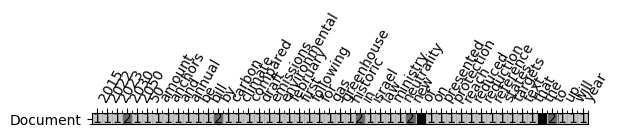

In [30]:
fig, ax = plt.subplots()

X = dfm.todense()
label = ['Document']

# Plot a heatmap of the dfm
ax.imshow(
    X,
    cmap = "Greys",
    norm = Normalize(vmin=0, vmax=3)
)

# Create a grid using minor ticks
ax.set_xticks(np.arange(X.shape[1])+0.5, minor=True)
ax.set_yticks(np.arange(X.shape[0])+0.5, minor=True)
ax.grid(which="minor", zorder=5)

# Set up x labels
ax.xaxis.tick_top()
ax.set_xticks(np.arange(X.shape[1]))
ax.set_xticklabels(vocab, rotation=60, ha="left", va="bottom")

# Set up y labels
ax.set_yticks(range(len(label)))
ax.set_yticklabels(label)

# Put the numbers in
for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        ax.text(n, m, X[m, n], ha="center", va="center")